In [13]:
import pandas as pd
from UKGE import *
from polls import *
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

In [15]:
cons = get_constituencies(res_path="outputs/resultsclusteredconstituencies.csv")
geolocator = Nominatim()

ConfigurationError: Using Nominatim with default or sample `user_agent` "geopy/2.4.1" is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`.

In [16]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="ukge-constituency-locations")

In [10]:
cons[0]

'Aberafan Maesteg'

In [29]:
def get_lat_long(address):
    print(address)
    location = geolocator.geocode(address +", United Kingdom")
    if location is None:
        print("N")
        location = geolocator.geocode(address)
    if location is None:
        print("NN")
        location = geolocator.geocode(address.split(" ")[0] + ", United Kingdom")
    print(location.address)
    print(location.latitude, location.longitude)
    return location.latitude, location.longitude

In [31]:
lat_dict = {}
long_dict = {}
for c in cons:
    lat, long = get_lat_long(c)
    lat_dict[c] = lat
    long_dict[c] = long

Aberafan Maesteg
N
Fairfield, Aberafan, Aberavon, Port Talbot, Neath Port Talbot, Cymru / Wales, SA12 6YD, United Kingdom
51.5979357 -3.7938665
Aldershot
Aldershot, Rushmoor, Hampshire, England, GU11 1BX, United Kingdom
51.2494169 -0.7630148
Aldridge-Brownhills
Aldridge and Brownhills Conservative Association, Walsall Road, Barr Common, Aldridge, Walsall, West Midlands Combined Authority, England, WS9 0AX, United Kingdom
52.5985756 -1.9269572
Altrincham and Sale West
Altrincham and Sale Sea Cadets, Bridgewater Way, Broadheath, West Timperley, Trafford, Greater Manchester, England, WA14 5DX, United Kingdom
53.398450100000005 -2.3518227839890278
Alyn and Deeside
N
NN
Eilean Donan, Totaig, Dornie, Highland, Alba / Scotland, United Kingdom
57.27409625 -5.515916174039468
Amber Valley
Amber Valley, Derbyshire, England, United Kingdom
53.029057 -1.4624953597461947
Arundel and South Downs
N
NN
Arundel, Arun, West Sussex, England, United Kingdom
50.85453835 -0.5648162995576137
Ashfield
Ashfield

In [30]:
df["Latitude"] = df["New constituency name"].apply(lambda x: get_lat_long(x)[0])

Aberafan Maesteg
N
Fairfield, Aberafan, Aberavon, Port Talbot, Neath Port Talbot, Cymru / Wales, SA12 6YD, United Kingdom
51.5979357 -3.7938665
Aldershot
Aldershot, Rushmoor, Hampshire, England, GU11 1BX, United Kingdom
51.2494169 -0.7630148
Aldridge-Brownhills
Aldridge and Brownhills Conservative Association, Walsall Road, Barr Common, Aldridge, Walsall, West Midlands Combined Authority, England, WS9 0AX, United Kingdom
52.5985756 -1.9269572
Altrincham and Sale West
Altrincham and Sale Sea Cadets, Bridgewater Way, Broadheath, West Timperley, Trafford, Greater Manchester, England, WA14 5DX, United Kingdom
53.398450100000005 -2.3518227839890278
Alyn and Deeside
N
NN
Eilean Donan, Totaig, Dornie, Highland, Alba / Scotland, United Kingdom
57.27409625 -5.515916174039468
Amber Valley
Amber Valley, Derbyshire, England, United Kingdom
53.029057 -1.4624953597461947
Arundel and South Downs
N
NN
Arundel, Arun, West Sussex, England, United Kingdom
50.85453835 -0.5648162995576137
Ashfield
Ashfield

KeyboardInterrupt: 

In [2]:
get_latest_polls_dict()

{'Con0': 0.18,
 'Lab0': 0.48,
 'Lib Dems0': 0.09,
 'SNP0': 0.03,
 'Green0': 0.07,
 'Reform0': 0.13,
 'Others0': 0.02000000000000013,
 'Con1': 0.26,
 'Lab1': 0.43,
 'Lib Dems1': 0.1,
 'SNP1': 0.03,
 'Green1': 0.05,
 'Reform1': 0.1,
 'Others1': 0.030000000000000027,
 'Con2': 0.21,
 'Lab2': 0.44,
 'Lib Dems2': 0.09,
 'SNP2': 0.03,
 'Green2': 0.05,
 'Reform2': 0.15,
 'Others2': 0.01}

In [88]:
df = pd.read_csv("outputs/resultsclusteredconstituencieslocations.csv")

In [89]:
cluster_des_dict = get_descriptive_cluster_labels()
df["Cluster Des"] = [cluster_des_dict[c] for c in df["Cluster"]]

In [53]:
df

,Unnamed: 0,ONS code,New constituency name,Total population,Aged 15 years and under,Aged 16 to 24 years,Aged 25 to 34 years,Aged 35 to 49 years,Aged 50 to 64 years,Aged 65 years and over,...,2005_Resultslib_pc,2005_Resultsref_pc,2005_Resultsnat_pc,2005_Resultsoth_pc,EngReg,Scot,Region,Cluster Des,Latitude,Longitude
0,0,W07000081,Aberafan Maesteg,92573,0.186065,0.095598,0.124386,0.179638,0.208793,0.205520,...,0.151778,0,0.107847,0.031996,0,False,Wales,Brexit,51.597936,-3.793867
1,1,E14001063,Aldershot,117430,0.185379,0.099821,0.158247,0.207732,0.187737,0.161083,...,0.283319,0,0.000000,0.056106,South East,False,South East,Brexit Conservative,51.249417,-0.763015
2,2,E14001064,Aldridge-Brownhills,93607,0.177914,0.089929,0.114617,0.177711,0.212078,0.227750,...,0.121319,0,0.000000,0.075047,West Midlands,False,West Midlands,Conservative,52.598576,-1.926957
3,3,E14001065,Altrincham and Sale West,100924,0.212833,0.082260,0.100719,0.219046,0.194859,0.190282,...,0.220874,0,0.000000,0.016996,North West,False,North West,Brexit Conservative,53.398450,-2.351823
4,4,W07000082,Alyn and Deeside,102072,0.181960,0.089956,0.130467,0.191326,0.208382,0.197909,...,0.174920,0,0.044298,0.044434,0,False,Wales,Brexit,57.274096,-5.515916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
627,627,S14000103,Perth and Kinross-shire,102000,0.164256,0.092739,0.113755,0.181623,0.218503,0.229124,...,0.150579,0,0.322447,0.021916,0,True,Scotland,Nat-Conservative,56.268329,-3.463439
628,628,S14000104,Rutherglen,90300,0.177859,0.091283,0.121138,0.200151,0.214436,0.195134,...,0.184026,0,0.145274,0.039048,0,True,Scotland,SNP,55.828389,-4.211653
629,629,S14000105,Stirling and Strathallan,103000,0.160007,0.119000,0.125081,0.174560,0.216834,0.204518,...,0.200584,0,0.141374,0.054498,0,True,Scotland,Nat-Conservative,56.260656,-3.779303
630,630,S14000058,West Aberdeenshire and Kincardine,97800,0.188758,0.085324,0.095580,0.206090,0.223372,0.200875,...,0.463047,0,0.112851,0.009100,0,True,Scotland,Nat-Conservative,50.909538,-1.406866


In [39]:
# df.to_csv("outputs/resultsclusteredconstituencieslocations.csv")

<Axes: xlabel='Aged 65 years and over', ylabel='2019_Resultscon'>

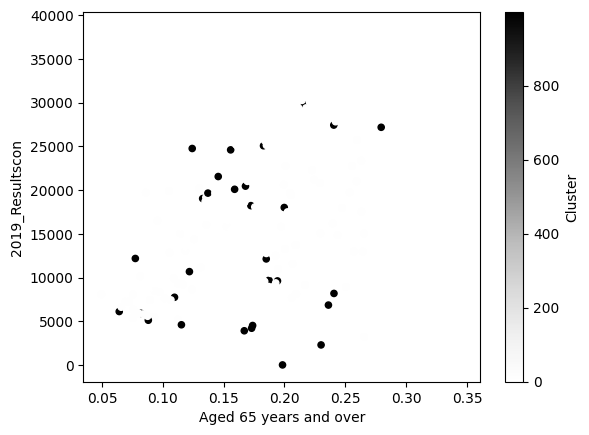

In [90]:
df.plot.scatter(x="Aged 65 years and over", y="2019_Resultscon", c="Cluster")

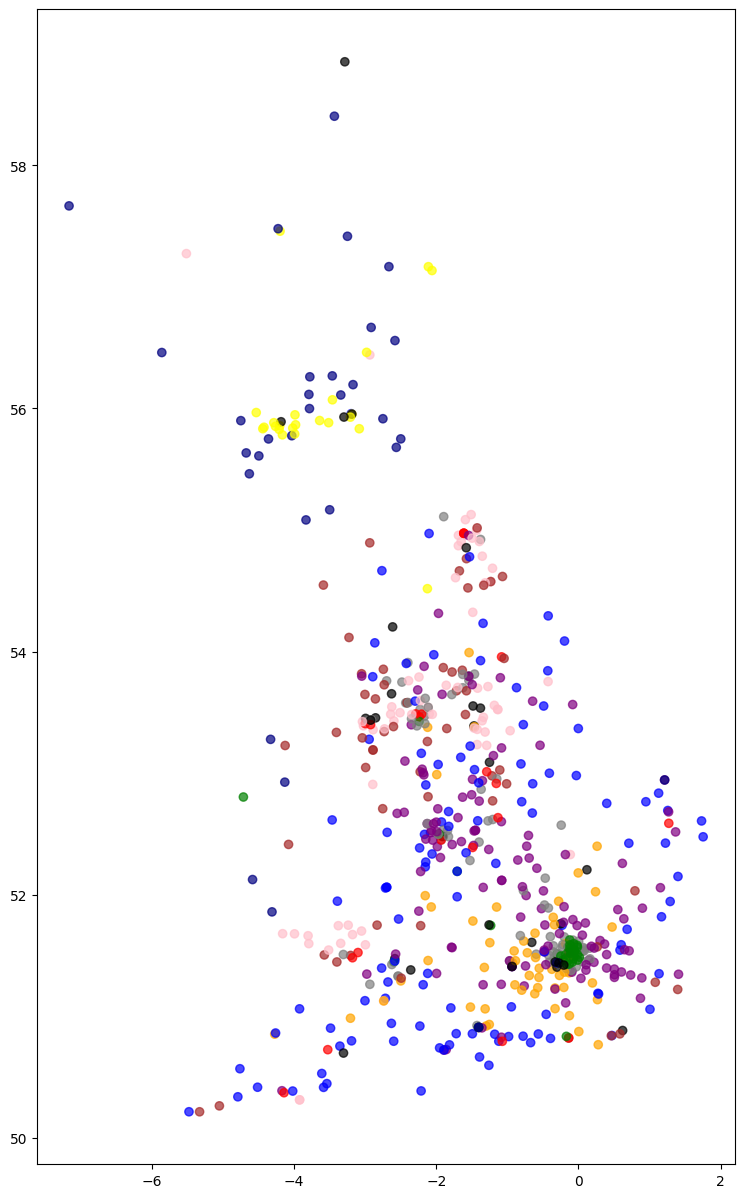

In [91]:
colours = ["red", "pink", "brown", "yellow", "purple", "blue", "grey", "black", "green", "orange", "navy"]
cluster_colours ={}
for k,c  in enumerate(list(set(list(df["Cluster"])))):
    cluster_colours[c] = colours[k]
ax = plt.figure()
ax.set_size_inches(9,15)
plt.scatter(df["Longitude"], df["Latitude"], c=[cluster_colours[c] for c in df["Cluster"]], alpha=0.7)

In [86]:
for c, col in cluster_colours.items():
    print(cluster_des_dict[c], col, df["Cluster"].value_counts()[c])

Labour red 21
Brexit pink 64
Marginal brown 59
SNP yellow 23
Brexit Conservative purple 122
Conservative blue 116
Immigrant grey 75
Anomalous black 30
Remain green 35
Lib-Con orange 55
Nat-Conservative navy 32


In [87]:
df["Cluster"].value_counts()

Cluster
4      122
5      116
6       75
1       64
2       59
7       55
8       35
9       32
999     30
3       23
0       21
Name: count, dtype: int64

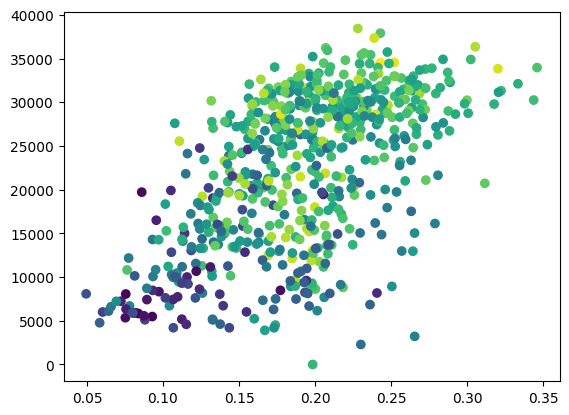

In [6]:
plt.scatter(df["Aged 65 years and over"], df["2019_Resultscon"], c=df["Ref16_Results"])